In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [4]:
df.columns=["date","state","cured","deaths","confirmed"]
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
ld=df[df["state"]=="Ladakh"]
ld.head()

,date,state,cured,deaths,confirmed
59,2020-03-07,Ladakh,0,0,2
65,2020-03-08,Ladakh,0,0,2
73,2020-03-09,Ladakh,0,0,2
86,2020-03-10,Ladakh,0,0,2
104,2020-03-11,Ladakh,0,0,2


In [6]:
import datetime as dt

In [7]:
ld["date"]=ld["date"].map(dt.datetime.toordinal)
ld.head()

<ipython-input-7-291cdba08e85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld["date"]=ld["date"].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
59,737491,Ladakh,0,0,2
65,737492,Ladakh,0,0,2
73,737493,Ladakh,0,0,2
86,737494,Ladakh,0,0,2
104,737495,Ladakh,0,0,2


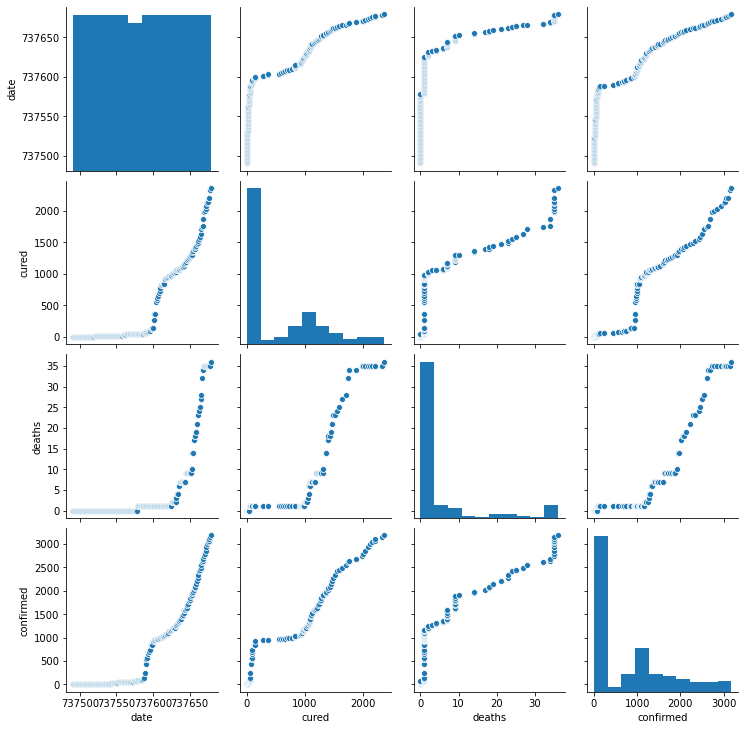

In [8]:
sns.pairplot(ld[["date","state","cured","deaths","confirmed"]])

# Now,Transform the data

In [9]:
ld["transconf"]=np.log(ld["confirmed"])
ld.head()

<ipython-input-9-2b866d1a5152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld["transconf"]=np.log(ld["confirmed"])


,date,state,cured,deaths,confirmed,transconf
59,737491,Ladakh,0,0,2,0.693147
65,737492,Ladakh,0,0,2,0.693147
73,737493,Ladakh,0,0,2,0.693147
86,737494,Ladakh,0,0,2,0.693147
104,737495,Ladakh,0,0,2,0.693147


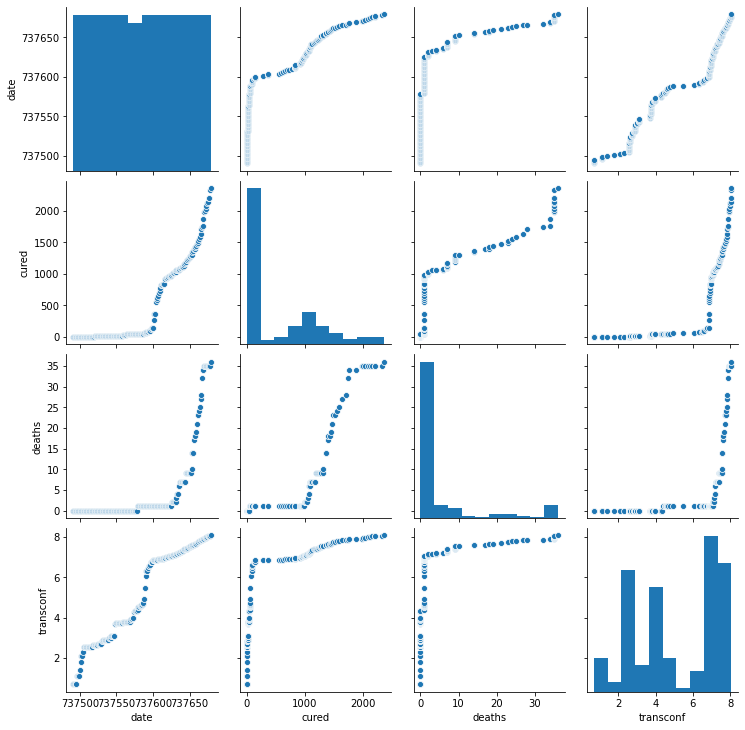

In [10]:
sns.pairplot(ld[["date","state","cured","deaths","transconf"]])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x=ld[["date"]]
y=ld[["transconf"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [13]:
model1=LinearRegression()

In [14]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [15]:
Accuracy1=model1.score(xtrain,ytrain)
Accuracy1

0.9452598651224262

In [16]:
ypred1=model1.predict(xtest)

In [17]:
ypred1

array([[5.23400346],
       [7.35031331],
       [3.97989393],
       [7.27193146],
       [1.51086578],
       [2.88254808],
       [3.31364824],
       [7.54626792],
       [5.74348546],
       [3.43122101],
       [4.76371239],
       [5.70429454],
       [5.58672177],
       [7.03678592],
       [7.78141346],
       [4.6069487 ],
       [2.76497531],
       [8.44765915],
       [2.92173901],
       [3.0785027 ],
       [7.19354961],
       [8.13413177],
       [3.940703  ],
       [6.01782192],
       [5.42995808],
       [3.66636654],
       [4.25423039],
       [7.11516777],
       [6.29215838],
       [2.29468424],
       [1.98115685],
       [1.74601132],
       [1.39329301],
       [6.64487669],
       [2.37306608],
       [1.62843855],
       [6.84083131],
       [3.35283916]])

In [18]:
ytest

,transconf
2972,5.476464
4898,7.372746
1853,3.737670
4828,7.303170
86,0.693147
942,2.708050
1302,2.995732
5073,7.448334
3440,6.846943
1398,3.091042


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
Er1=mean_squared_error(ypred1,ytest)
Er1


0.2748915183109517

In [21]:
mae1=mean_absolute_error(ypred1,ytest)
mae1

0.41019264720249443

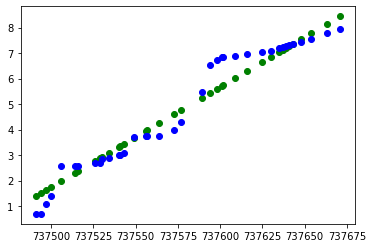

In [22]:
plt.scatter(xtest,ypred1,color="g")
plt.scatter(xtest,ytest,color="b")

In [23]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(criterion="mae",splitter="random")

In [24]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mae', splitter='random')

In [25]:
Accuracy2=model2.score(xtrain,ytrain)
Accuracy2

1.0

In [26]:
ypred2=model2.predict(xtest)
ypred2

array([6.0799332 , 7.37462902, 3.73766962, 7.29029288, 0.69314718,
       2.83321334, 2.89037176, 7.47873483, 6.85224257, 2.99573227,
       4.34380542, 6.85224257, 6.72862861, 7.17472431, 7.5837563 ,
       3.97029191, 2.7080502 , 7.95155933, 2.83321334, 2.89037176,
       7.24708058, 7.75362355, 3.73766962, 6.89770494, 6.47543272,
       3.71357207, 3.76120012, 7.24708058, 6.94793707, 2.56494936,
       2.56494936, 1.79175947, 0.69314718, 7.07157336, 2.56494936,
       1.09861229, 7.09506438, 2.99573227])

In [27]:
Er2=mean_squared_error(ypred2,ytest)
Er2

0.0151314796838508

In [28]:
mae2=mean_absolute_error(ypred2,ytest)
mae2

0.04376509297529557

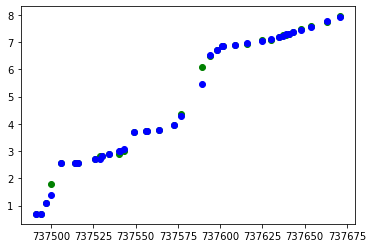

In [29]:
plt.scatter(xtest,ypred2,color="g")
plt.scatter(xtest,ytest,color="b")

In [30]:
from sklearn.svm import SVR
model3=SVR(C=100)

In [31]:
model3.fit(xtest,ytest)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100)

In [32]:
Accuracy3=model3.score(xtrain,ytrain)
Accuracy3

0.9838321700068603

In [33]:
ypred3=model3.predict(xtest)
ypred3

array([5.83709464, 7.272446  , 3.52490907, 7.22970889, 0.90519457,
       2.87662749, 3.07764502, 7.40906903, 6.74665509, 3.13347541,
       4.79074924, 6.6943927 , 6.51748323, 7.14777275, 7.60921888,
       4.46691471, 2.8094582 , 8.00950542, 2.89709007, 2.9723227 ,
       7.1946525 , 7.89167991, 3.48603306, 7.01489834, 6.23887834,
       3.26678526, 3.86104287, 7.16740953, 7.12715539, 2.39954997,
       1.93793275, 1.47045586, 0.59345828, 7.13398491, 2.48835652,
       1.19885906, 7.12760428, 3.09575732])

In [34]:
Er3=mean_squared_error(ypred3,ytest)
Er3

0.046299922720124904

In [35]:
mae3=mean_absolute_error(ypred3,ytest)
mae3

0.1613691317945063

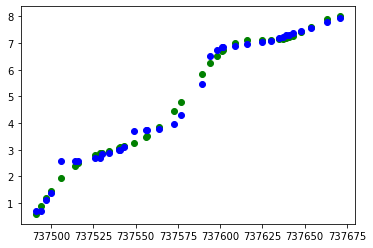

In [36]:
plt.scatter(xtest,ypred3,color="g")
plt.scatter(xtest,ytest,color="b")

In [37]:
print(Accuracy1)
print(Accuracy2)
print(Accuracy3)

0.9452598651224262
1.0
0.9838321700068603


In [38]:
print(Er1)
print(Er2)
print(Er3)

0.2748915183109517
0.0151314796838508
0.046299922720124904


In [39]:
print(mae1)

0.41019264720249443


In [40]:
Res=pd.DataFrame({"Model":["Linear Regression","Desicion Tree","SVR"],"Accuracy":[Accuracy1,Accuracy2,Accuracy3],"MSE":[Er1,Er2,Er3],"MAE":[mae1,mae2,mae3]},index=[1,2,3])
Res

,Model,Accuracy,MSE,MAE
1,Linear Regression,0.945260,0.274892,0.410193
2,Desicion Tree,1.000000,0.015131,0.043765
3,SVR,0.983832,0.046300,0.161369


In [41]:
#Res.to_csv("Results for Regression Models(Ladakh).csv",index=False)

In [42]:
Res1=pd.read_csv("Results for Regression Models(Ladakh).csv")
Res1

,Model,Accuracy,MSE,MAE
0,Linear Regression,0.950373,0.343575,0.512071
1,Desicion Tree,1.000000,0.003717,0.033760
2,SVR,0.970394,0.063859,0.176449


# Now Predict the no .of cases

In [43]:
def find(x):
    a=model1.predict(np.array([[x]]))+model2.predict(np.array([[x]]))+model3.predict(np.array([[x]]))
    return a/3

In [44]:
ans=find(737675)
ans

array([[8.20495328]])

In [ ]:
a=up[up["date"]==737675]
a

In [ ]:
ans=np.exp(ans)
ans

In [ ]:
ytestf=np.exp(ytest)
ytestf

In [ ]:
plt.scatter(xtest,ypred3f,color="r")
plt.scatter(xtest,ytestf,color="g")